# import all dependencies related to our project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# step 1: load the data
# i had downloaded the data from kaggle data
# used pandas to load the data 

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df =pd.read_excel('pima-data.xlsx')
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
5,5,116,74,0,0,25.6,0.201,30,0,0.0000,False,False
6,3,78,50,32,88,31.0,0.248,26,1,1.2608,True,True
7,10,115,0,0,0,35.3,0.134,29,0,0.0000,False,False
8,2,197,70,45,543,30.5,0.158,53,1,1.7730,True,True
9,8,125,96,0,0,0.0,0.232,54,1,0.0000,True,True


In [6]:
df.shape


(768, 12)

# step 2: cleaning the dataset

# checking the null values present in our dataset or not


In [7]:
df.isnull().values.any()
#or df.isnull().sum()
#if there are null values handle the data using dropna or fillna

np.False_

# fiding the corelation between the columns

In [8]:
def check_corr(size):
    corr = df.corr()
    fig, ax=plt.subplots(figsize=(size,size))
    cmap='rainbow'
    ax.matshow(corr, cmap=cmap)
    plt.xticks(range(len(corr.columns)),corr.columns, rotation=60)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

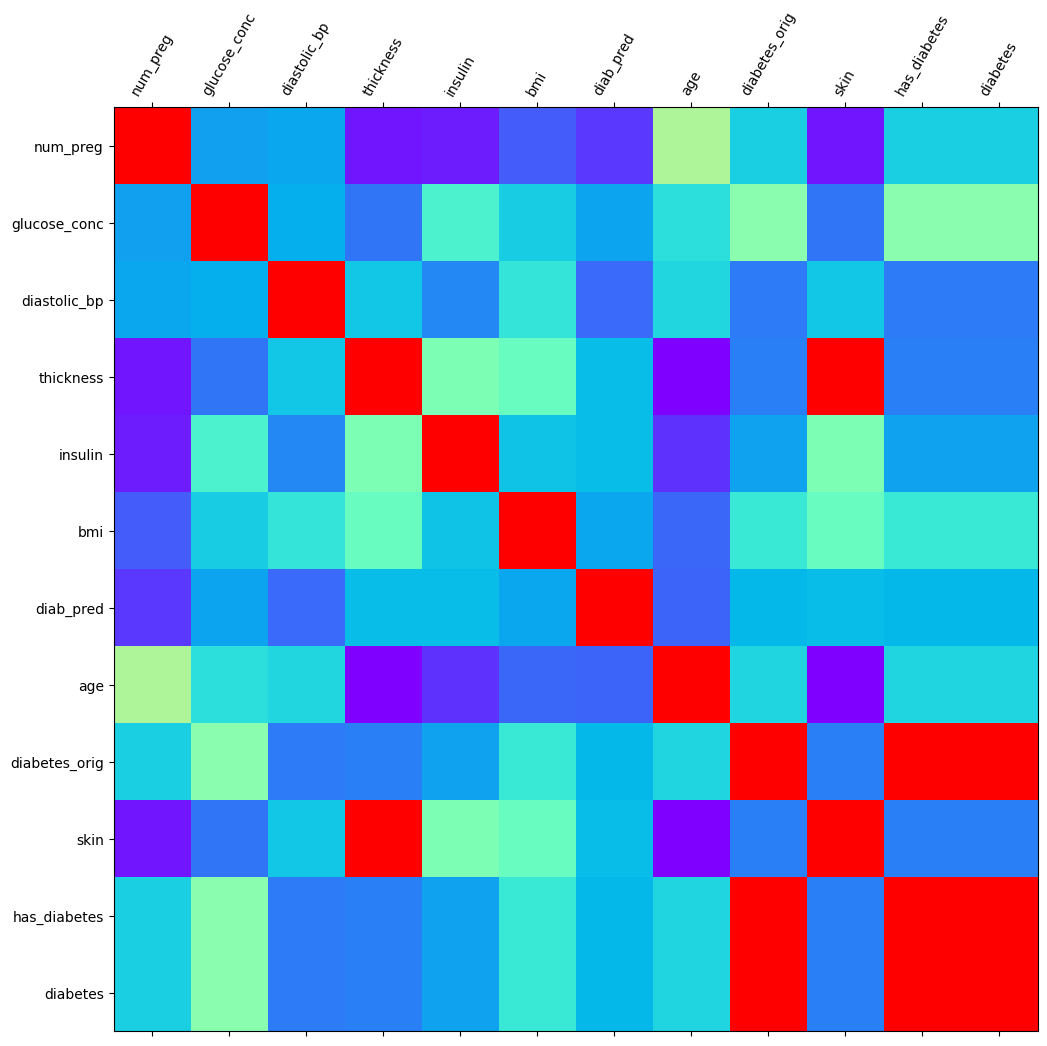

In [9]:
check_corr(12)

# we observe below columns are correlated to each other
# skin and thickenss
# diabetes origin and has diabetes are correlated to each other
# diabetes origin and diabetes are correlated to each other


# drop the correlated coluns

In [10]:
df.drop('thickness', axis=1, inplace =True)


In [11]:
df.drop('diabetes_orig', axis=1, inplace = True)

In [12]:
df.drop('has_diabetes', axis=1, inplace=True)

In [13]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,25.6,0.201,30,0.0000,False
6,3,78,50,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0.0,0.232,54,0.0000,True


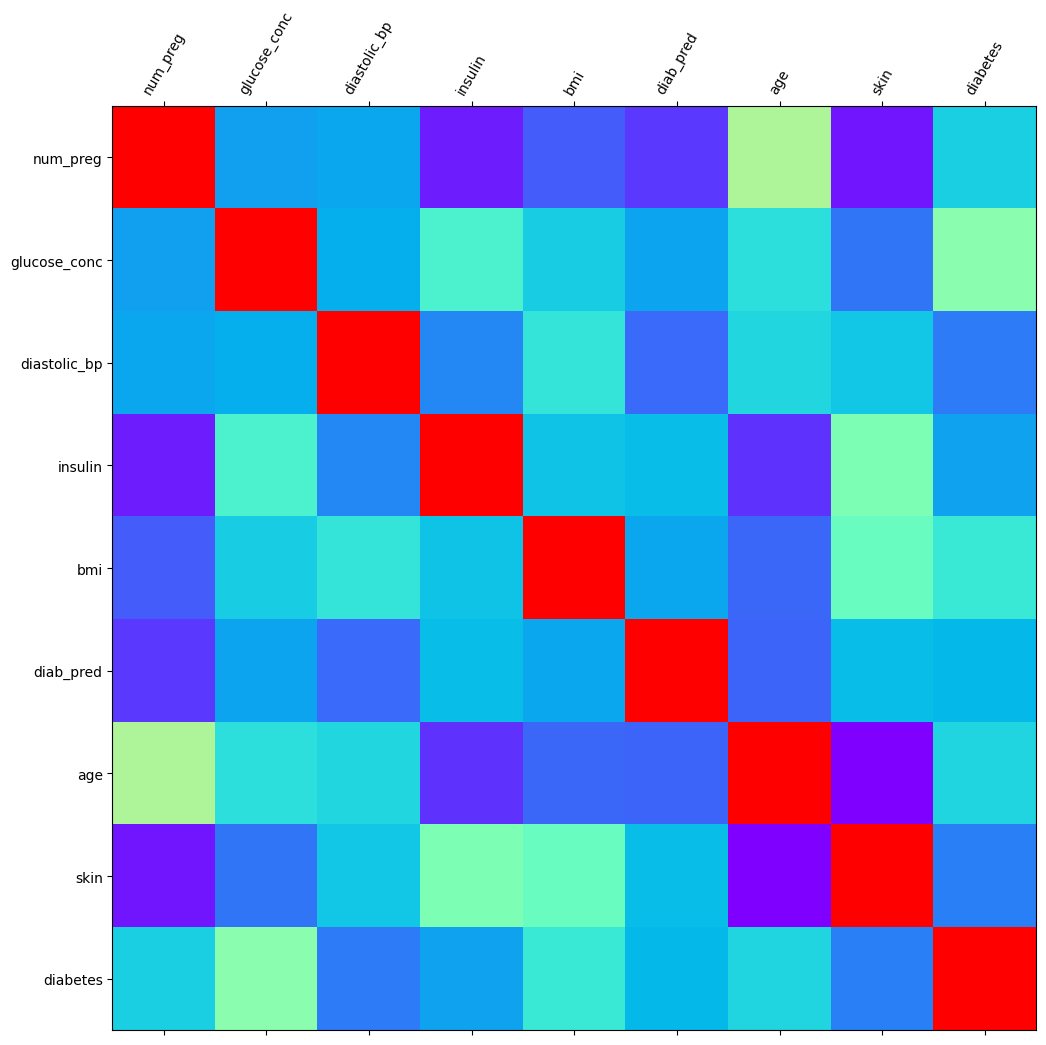

In [14]:
check_corr(12)

# convert string data to integer type

In [15]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


In [16]:
df['diabetes'].unique()

array([ True, False])

In [17]:
#dict1={'diabetes':[True, False]}
#dict2={'diabetes':[1,0]}
#df.replace(dict1,dict2, inplace= True)

In [18]:
df['diabetes'] = df['diabetes'].map({True:1, False:0})

In [19]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


# check the proportion of data

In [20]:
num_true=len(df.loc[df['diabetes']==1])

In [21]:
print(f"num of true are {num_true}")

num of true are 268


In [22]:
num_false=len(df.loc[df['diabetes']==0])
print(f"num of false are {num_false}")

num of false are 500


In [23]:
true_per=((num_true)/(num_true+num_false))*100
false_per=((num_false)/(num_false+num_true))*100
print(f"per of true is {true_per}")
print(f"per of false is {false_per}")

per of true is 34.89583333333333
per of false is 65.10416666666666


# step 3 : Train, Test, Split

In [24]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split
input_columns=['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin']
output_columns=['diabetes']
x=df[input_columns].values
y=df[output_columns].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [27]:
print(x_train.shape)

(537, 8)


In [28]:
print(y_train.shape)

(537, 1)


In [29]:
print(x_test.shape)

(231, 8)


In [30]:
print(y_test.shape)

(231, 1)


In [31]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


# check the training percentage and testing percentages

In [32]:
print('{0:02f}% in training set'.format((len(x_train)/len(df.index))*100))
print('{0:02f}% in testing set'.format((len(x_test)/len(df.index))*100))

69.921875% in training set
30.078125% in testing set


In [33]:
print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ]==1]),
                                             (len(y_train[y_train[ : ] ==1])/len(y_train)*100)))
print('training false:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ]==0]),
                                             (len(y_train[y_train[ : ] ==0])/len(y_train)*100)))
print('Test true:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ]==1]),
                                             (len(y_test[y_test[ : ] ==1])/len(y_test)*100)))
print('Test false:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ]==0]),
                                             (len(y_test[y_test[ : ] ==0])/len(y_test)*100)))


training true:188 (35.01%)
training false:349 (64.99%)
Test true:80 (34.63%)
Test false:151 (65.37%)


# step 4: post split data preparation

In [34]:
len(df.columns)

9

In [35]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [36]:
total_num_preg = len(df.loc[df['num_preg']==0])
print(f'number of Rows missing in num_preg column is {total_num_preg}')

total_glucose_conc = len(df.loc[df['glucose_conc']==0])
print(f'number of Rows missing in glucose_conc column is {total_glucose_conc}')

total_diastolic_bp = len(df.loc[df['diastolic_bp']==0])
print(f'number of Rows missing in diastolic_bp column is {total_diastolic_bp}')

total_insulin = len(df.loc[df['insulin']==0])
print(f'number of Rows missing in insulin column is {total_insulin}')

total_bmi = len(df.loc[df['bmi']==0])
print(f'number of Rows missing in bmi column is {total_bmi}')

total_diab_pred = len(df.loc[df['diab_pred']==0])
print(f'number of Rows missing in diab_pred column is {total_diab_pred}')

total_age = len(df.loc[df['age']==0])
print(f'number of Rows missing in age column is {total_age}')

total_skin = len(df.loc[df['skin']==0])
print(f'number of Rows missing in skin column is {total_skin}')

number of Rows missing in num_preg column is 111
number of Rows missing in glucose_conc column is 5
number of Rows missing in diastolic_bp column is 35
number of Rows missing in insulin column is 374
number of Rows missing in bmi column is 11
number of Rows missing in diab_pred column is 0
number of Rows missing in age column is 0
number of Rows missing in skin column is 227


# simple imputer

# handle zero values using simple imputer

In [37]:
from sklearn.impute import SimpleImputer
fill_zeros = SimpleImputer(missing_values=0, strategy='mean')
x_train = fill_zeros.fit_transform(x_train)
x_test = fill_zeros.fit_transform(x_test)

In [38]:
x_train[:5]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.65480000e+00],
       [4.00000000e+00, 1.31000000e+02, 6.80000000e+01, 1.66000000e+02,
        3.31000000e+01, 1.60000000e-01, 2.80000000e+01, 8.27400000e-01],
       [1.00000000e+00, 1.03000000e+02, 3.00000000e+01, 8.30000000e+01,
        4.33000000e+01, 1.83000000e-01, 3.30000000e+01, 1.49720000e+00]])

In [39]:
x_test[:5]

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, 1.90000000e+02,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01, 1.30020000e+00],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, 1.56050847e+02,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01, 1.26080000e+00],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, 1.56050847e+02,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01, 1.19696203e+00],
       [8.00000000e+00, 1.07000000e+02, 8.00000000e+01, 1.56050847e+02,
        2.46000000e+01, 8.56000000e-01, 3.40000000e+01, 1.19696203e+00],
       [7.00000000e+00, 1.36000000e+02, 9.00000000e+01, 1.56050847e+02,
        2.99000000e+01, 2.10000000e-01, 5.00000000e+01, 1.19696203e+00]])

# standardise the data

# compares the data
# doesn't give variations
# used to integrate with html, css


In [40]:
# by standardizing the data we can improve performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# step: Training the models

In [41]:
y_train[0:5]

array([[0],
       [0],
       [1],
       [0],
       [0]])

In [42]:
# to convert 2d to 1d
y_train = y_train.astype(int).ravel()
y_test = y_test.astype(int).ravel()

## train the algorithm using naive bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [44]:
from sklearn import metrics
nb_predict_model = nb_model.predict(x_train)
print(f'predicted accuracy {metrics.accuracy_score(y_train, nb_predict_model)}')

predicted accuracy 0.7541899441340782


In [45]:
nb_predict_test = nb_model.predict(x_test)
print(f'predicted accuracy {metrics.accuracy_score(y_test, nb_predict_test)}')

predicted accuracy 0.7359307359307359


# step 6: using confusion matrix verify the result

In [46]:
print("confusion matrix")
print(f"{metrics.confusion_matrix(y_test,nb_predict_test)}")

confusion matrix
[[118  33]
 [ 28  52]]


In [47]:
accuracy=((118+52)/(118+52+28+33))*100
print(accuracy)

73.59307359307358


In [48]:
print("classification_report_matrix")
print(f"{metrics.classification_report(y_test, nb_predict_test)}")

classification_report_matrix
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# train the model using random forest algorithm

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
from sklearn import metrics
rf_predict_model = rf_model.predict(x_train)
print(f'predicted accuracy {metrics.accuracy_score(y_train, rf_predict_model)}')

predicted accuracy 1.0


In [51]:
rf_predict_test = rf_model.predict(x_test)
print(f'predicted accuracy {metrics.accuracy_score(y_test, rf_predict_test)}')

predicted accuracy 0.7532467532467533


In [52]:
print("confusion matrix")
print(f"{metrics.confusion_matrix(y_test,rf_predict_test)}")

confusion matrix
[[120  31]
 [ 26  54]]


In [53]:
accuracy=((120+54)/(120+31+26+54))*100
print(accuracy)

75.32467532467533


In [54]:
print("classification_report_matrix")
print(f"{metrics.classification_report(y_test, rf_predict_test)}")

classification_report_matrix
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



## train the model using knn

In [55]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
from sklearn import metrics
k_neighbor_predict_model = k_neighbor.predict(x_train)
print(f'predicted accuracy {metrics.accuracy_score(y_train, k_neighbor_predict_model)}')

predicted accuracy 0.8379888268156425


In [57]:
k_neighbor_predict_test = k_neighbor.predict(x_test)
print(f'predicted accuracy {metrics.accuracy_score(y_test, k_neighbor_predict_test)}')

predicted accuracy 0.7012987012987013


In [58]:
print("confusion matrix")
print(f"{metrics.confusion_matrix(y_test,k_neighbor_predict_test)}")

confusion matrix
[[113  38]
 [ 31  49]]


In [59]:
accuracy=((113+49)/(113+38+31+49))*100
print(accuracy)

70.12987012987013


In [60]:
print("classification_report_matrix")
print(f"{metrics.classification_report(y_test, k_neighbor_predict_test)}")

classification_report_matrix
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       151
           1       0.56      0.61      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231



## randomforest is better for our model

In [61]:
#input_data=[6,	148,	72,	0,	33.6,	0.627,	50,	1.3790]
input_data=[1,	85,	66,	0,	26.6,	0.351,	31,	1.1426]

input_array = np.asarray(input_data).reshape(1,-1)
print(input_array)
# Apply the same imputer and scaler to new data
input_array = fill_zeros.transform(input_array)
input_array = scaler.transform(input_array)
print(input_array)
prediction = rf_model.predict(input_array)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")

[[ 1.     85.     66.      0.     26.6     0.351  31.      1.1426]]
[[-1.15687814 -1.22831158 -0.51185924  0.00844534 -0.81575723 -0.34795441
  -0.17769495  0.04163973]]
Prediction: Not Diabetic


In [62]:
input_data=[6,	148,	72,	0,	33.6,	0.627,	50,	1.3790]

input_array = np.asarray(input_data).reshape(1,-1)
print(input_array)
# Apply the same imputer and scaler to new data
input_array = fill_zeros.transform(input_array)
input_array = scaler.transform(input_array)
print(input_array)
prediction = rf_model.predict(input_array)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")

[[  6.    148.     72.      0.     33.6     0.627  50.      1.379]]
[[ 0.57468297  0.86398822 -0.01979041  0.00844534  0.19026321  0.45960931
   1.44979298  0.75044047]]
Prediction: Diabetic


In [63]:
import pickle
# Save model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
# Save imputer
with open('imputer.pkl', 'wb') as f:
    pickle.dump(fill_zeros, f)